# Finn McSheffrey and Alex Nguyen

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
github_url1 = 'https://raw.githubusercontent.com/Jamess-ops/my_nbooks/main/tsa_claims1.zip'
github_url2 = 'https://raw.githubusercontent.com/Jamess-ops/my_nbooks/main/tsa_claims2.zip'
import requests
response = requests.get(github_url1, allow_redirects=True)
if response.status_code == 200:
    with open('tsa_claims1.zip', 'wb') as f:
        f.write(response.content)
    print("File Downloaded!")
else:
    print(f"File not Downloaded!")
import requests
response = requests.get(github_url2, allow_redirects=True)
if response.status_code == 200:
    with open('tsa_claims2.zip', 'wb') as f:
        f.write(response.content)
    print("File Downloaded!")
else:
    print(f"File not Downloaded!")
from zipfile import ZipFile
with ZipFile('tsa_claims1.zip', mode='r') as zip:
    zip.extractall()
    for file in zip.infolist():
       print(file.filename, file.compress_size, file.file_size)
from zipfile import ZipFile
with ZipFile('tsa_claims2.zip', mode='r') as zip:
    zip.extractall()
    for file in zip.infolist():
       print(file.filename, file.compress_size, file.file_size)


# This code downloads files from my GitHub

File Downloaded!
File Downloaded!
tsa_claims1.csv 2255822 17607075
tsa_claims2.csv 4521460 35237765


In [4]:
tsa = pd.read_csv('tsa_claims1.csv')

/tmp/ipykernel_2818/911254078.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tsa = pd.read_csv('tsa_claims1.csv')


In [5]:
tsa.head()
# See what we are working with

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
2,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
3,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
4,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle


# What is the most common type of insurance claim?

In [7]:
claim_counts = tsa['Claim Type'].value_counts()
# Cleaning it to show counts per claim type

<Axes: xlabel='Claim Type'>

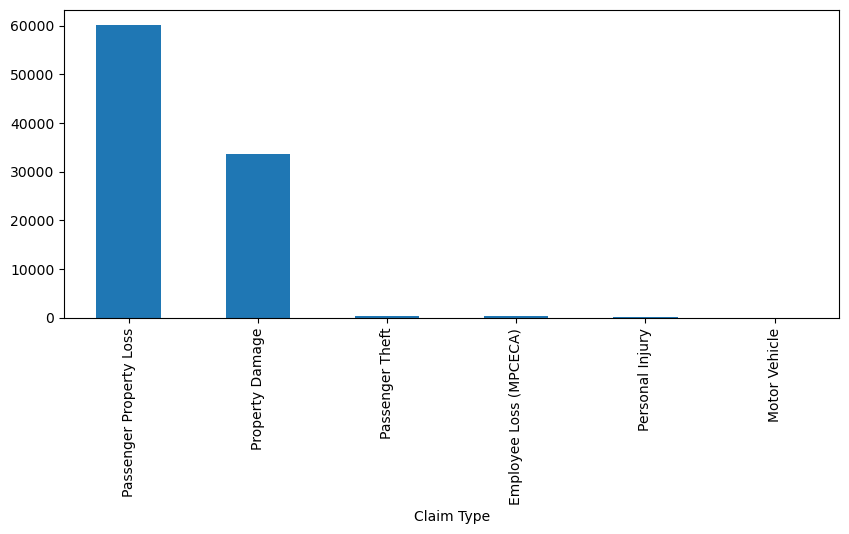

In [8]:
claim_counts.plot(kind='bar', figsize=(10, 4))
# Plot shows claim type and its count
# It is passenger property loss

## It is passenger property loss. The graph shows different claim types and its counts.

# Which claim site within the airport are claims most commonly filed for?

In [11]:
claim_site = tsa['Claim Site'].value_counts()
# Cleaning it to show count per claim site

<Axes: xlabel='Claim Site'>

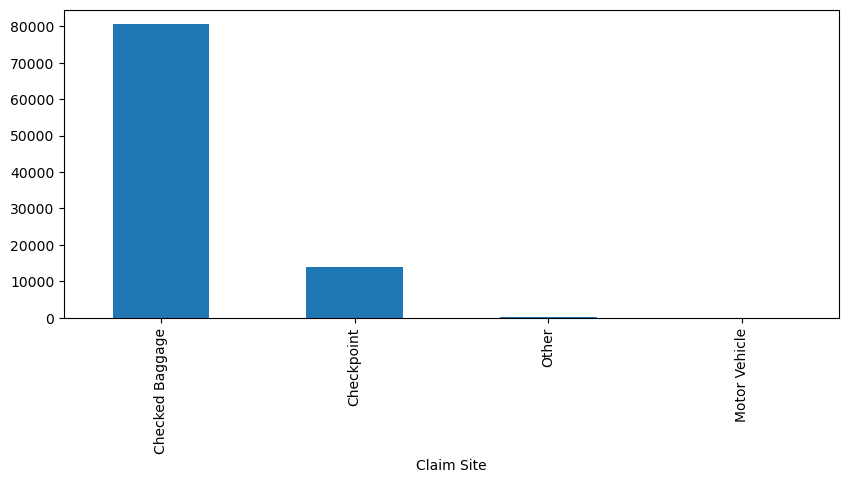

In [12]:
claim_site.plot(kind='bar', figsize=(10, 4))
# Plot shows claim site and its count
#It is checked baggage

## It is Checked Baggage. The graph shows different claim sites and its counts.

# What type of claim is made most at each claim site?

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


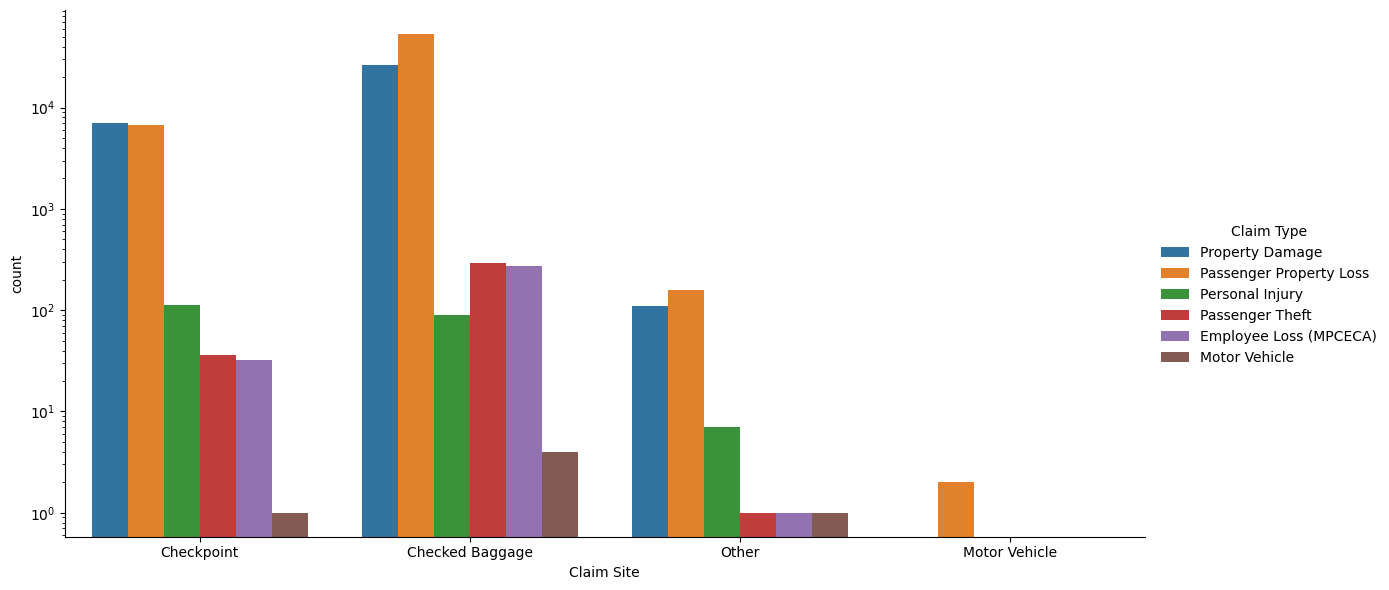

In [15]:
import matplotlib.pyplot as plt
cat_plot = sns.catplot(data=tsa, kind='count', x='Claim Site', hue='Claim Type', aspect=2, height=6)
cat_plot.set(yscale='log')
plt.show()

# Plots different claim types per claim site

### Chart shows individual claim type counts per claim site.
- Checkpoint: Property Damage
- Checked Baggage: Passenger Property Loss
- Other: Passenger Property Loss
- Motor Vehicle: Passenger Property Loss

# What is the typical claim amount?

In [18]:
mode=tsa['Claim Amount'].mode
mode

# Finding claim amount using mode (Specified to use mode not claim)

<bound method Series.mode of 0         350.00
1         278.88
2          50.00
3          84.79
4         459.01
          ...   
94843     175.90
94844     695.00
94845      25.50
94846      20.00
94847    1228.95
Name: Claim Amount, Length: 94848, dtype: float64>

## The typical claim amount is $350.00. (Told to use mode so we did)

# What is the overall claim approval rate for the entire U.S.?

In [21]:
# Count total claims
total_claims = tsa.shape[0]

approved_claims = tsa[tsa['Status'] == 'Approved'].shape[0]

approval_rate = (approved_claims / total_claims) * 100 if total_claims > 0 else 0

approval_rate

24.425396423751685

## The overal claim approval rate for the entire U.S. is approx. 24.4%

In [23]:
tsa2 = pd.read_csv('tsa_claims2.csv', low_memory=False)
def convert_money(value):
    if isinstance(value, str):
        value = (value.replace('$', ''). replace(',', ''))
# Cleans up the symbols
        try:
            return float(value)
        except ValueError:
            return None
        return None

tsa2['Claim Amount'] = tsa2['Claim Amount'].apply(convert_money)
tsa2['Close Amount'] = tsa2['Close Amount'].apply(convert_money)
tsa2

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,NaN,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,-,NaN,NaN


In [24]:
dropped = tsa2.dropna()
dropped
# dropped the NA values

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
5,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145136,2010010667204,31-Dec-09,12/12/2009 9:29,FLL,Ft. Lauderdale-Hollywood International,AirTran Airlines,Passenger Property Loss,Checked Baggage,Luggage (all types including footlockers),12.95,Approved,12.95,Approve in Full
145138,2010010567195,31-Dec-09,12/14/2009 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),175.90,Denied,0.00,Deny
145139,2010010667196,31-Dec-09,12/17/2009 7:55,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cell Phones (smartphone type-blackberry; iphon...,695.00,Denied,0.00,Deny
145140,2010010667198,31-Dec-09,12/15/2009 0:00,SMF,Sacramento International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Locks,25.50,Denied,0.00,Deny


In [25]:
tsafloat = dropped['Claim Amount'].astype(float)
tsafloat.head()
# float type

0    350.00
2    278.88
3     50.00
4     84.79
5    459.01
Name: Claim Amount, dtype: float64

In [26]:
tsadate = pd.to_datetime(tsa2['Date Received'])
tsadate
# its in date time

/tmp/ipykernel_2818/1600207781.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tsadate = pd.to_datetime(tsa2['Date Received'])


0        2002-01-04
1        2002-02-02
2        2002-02-04
3        2002-02-07
4        2002-02-18
            ...    
204262   2015-11-20
204263   2015-12-17
204264   2015-12-22
204265   2015-12-30
204266   2015-12-31
Name: Date Received, Length: 204267, dtype: datetime64[ns]

# If a claim is approved or settled, what percent of the claim amount do the airports pay?

In [28]:
appset = dropped[(dropped['Status'] == 'Approved') | (dropped['Status'] == 'Settled')]
claimfloat = appset['Claim Amount'].astype(float)
closefloat = appset['Close Amount'].astype(float)
claimtot = claimfloat.sum()
closetot = closefloat.sum()
percent = (closetot / claimtot) * 100
percent
# Found taking approved and settled from status and finding the total claim and close amount to
# get a percent

69.88953058501683

## It is 69.9%.

# What are the five airports with the most claims?

In [58]:
claim_counts = dropped['Airport Name'].value_counts()
claim_counts.head()

# Finds airports with the highest value counts 

Airport Name
Los Angeles International Airport       3517
Chicago O'Hare International Airport    3093
John F. Kennedy International           3027
Newark International Airport            3012
Miami International Airport             2480
Name: count, dtype: int64

## Top five airports with the most claims:
- Los Angeles International Airport
- Chicago O'Hare International Airport
- John F. Kennedy International
- Newark International Airport
- Miami International Airport

# Has the total close amount increased or decreased over time?

## The total close amount hasn't change much over time (no correlation) .

<Axes: >

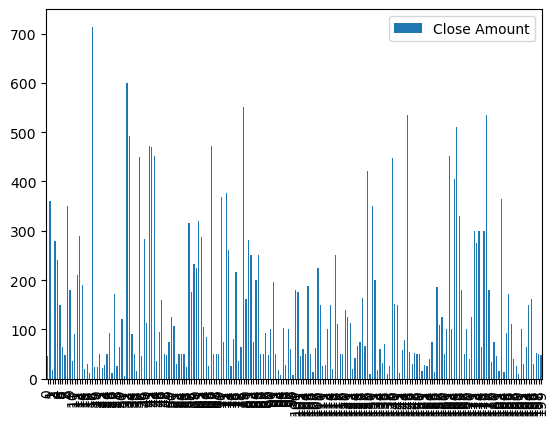

In [60]:
date = appset.sort_values(by='Date Received',ascending=False)
new = date.head(100)
old = date.tail(100)
time = pd.concat([new, old], axis=0, ignore_index=True)
time['Close Amount'] = pd.to_numeric(time['Close Amount'], errors='coerce')
time.plot(kind='bar', y='Close Amount')

# Takes from approved and settled status and sorts it, we then take the top and bottom values and
# combine it in order to graph it. Seeing the x values does not truly matter as it is already sorted

In [36]:
dropped.query('Status == "Settled"').sort_values(by='Date Received', ascending=False)
# Just checking

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
141538,2009060359790,9-Sep-09,4/14/2009 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Eyeglasses - (including contact lenses),450.00,Settled,280.00,Settle
128092,2008091549956,9-Sep-08,8/17/2008 0:00,BDL,Bradley International Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Eyeglasses - (including contact lenses),610.00,Settled,289.75,Settle
128091,2008091549903,9-Sep-08,8/23/2008 0:00,DFW,Dallas-Fort Worth International Airport,Mexicana,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; MP...,358.99,Settled,179.50,Settle
128090,2008091149787,9-Sep-08,7/17/2008 0:00,SAN,San Diego International,Continental Airlines,Passenger Property Loss,Checked Baggage,Eyeglasses - (including contact lenses); Other,297.39,Settled,241.11,Settle
128089,2008091149779,9-Sep-08,8/21/2008 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,300.00,Settled,150.00,Settle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4489,0401023L,1-Apr-03,2/21/2003 0:00,PDX,Portland International,Alaska Airlines,Passenger Property Loss,Checked Baggage,Other,80.00,Settled,40.00,Settle
4487,0401020L,1-Apr-03,3/3/2003 0:00,MCO,Orlando International Airport,Spirit Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,96.00,Settled,48.00,Settle
4486,0401015L,1-Apr-03,3/11/2003 0:00,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),350.00,Settled,10.00,Settle
4480,0401003L,1-Apr-03,2/15/2003 0:00,BNA,Nashville International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,59.99,Settled,30.00,Settle
